# Plotting Few-Shot Variation

In [46]:
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [47]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import json
import os
import numpy as np

In [48]:
ontologies = [("astronomy-ontology", 10, "Astronomy", "seagreen"),
              ("case-uco-owl-trafficking", 8, "CASE", "coral"),
              ("wines-ontology", 4, "Wines", "blueviolet")]

In [60]:
plt.rcParams.update({'font.size': 15})

## Variation Plots over number of Examples

### Llama3

In [50]:
llama_map_results = {
    "astronomy-ontology": {
        "generic": {
            "depth": [],
            "1": [],
        },
        "topic": {
            "depth": [],
            "1": [],
        },
        "ontology": {
            "depth": [],
            "1": [],
        },
        "both": {
            "depth": [],
            "1": [],
        },
    },
    "case-uco-owl-trafficking": {
        "generic": {
            "depth": [],
            "1": [],
        },
        "topic": {
            "depth": [],
            "1": [],
        },
        "ontology": {
            "depth": [],
            "1": [],
        },
        "both": {
            "depth": [],
            "1": [],
        },
    },
    "wines-ontology": {
        "generic": {
            "depth": [],
            "1": [],
        },
        "topic": {
            "depth": [],
            "1": [],
        },
        "ontology": {
            "depth": [],
            "1": [],
        },
        "both": {
            "depth": [],
            "1": [],
        },
    },
}

In [51]:
llm = "llama3-7B"

In [52]:
for ont, depth, _, _ in ontologies:
    uids = list(map(lambda x: (x.path,
                               f"/home/upal/PhD/Experiments/llm_ontology_awareness/run_args/term_typing/ranked_retrieval/0_shot/{llm}/{ont}/{os.path.basename(x.path)}.json"),
                    os.scandir(f"/home/upal/Results/llm_ontology_awareness/term_typing/ranked_retrieval/0_shot/{llm}/{ont}")))
    for i in range(1, 11):
        uids.extend(list(map(lambda x: (x.path,
                               f"/home/upal/PhD/Experiments/llm_ontology_awareness/run_args/term_typing/ranked_retrieval/{i}_shot/most_common/{llm}/{ont}/{os.path.basename(x.path)}.json"),
                    os.scandir(f"/home/upal/Results/llm_ontology_awareness/term_typing/ranked_retrieval/{i}_shot/most_common/{llm}/{ont}"))))
    for result_path, run_args_path in uids:
        with open(os.path.join(result_path, "run_1", "pred_metrics.json"), "r") as f:
            data = json.load(f)
        with open(run_args_path, "r") as f:
           run_args = json.load(f)
        if ("Generic Prompt" in run_args["description"]):
            llama_map_results[ont]["generic"]["depth"].append(data[f"map_{depth}"])
            # map_results[ont]["generic"]["1"].append(data["map_1"])
        elif ("Domain Prompt" in run_args["description"]):
            llama_map_results[ont]["topic"]["depth"].append(data[f"map_{depth}"])
            # map_results[ont]["topic"]["1"].append(data["map_1"])
        elif ("Domain and Ontology Prompt" in run_args["description"]):
            llama_map_results[ont]["both"]["depth"].append(data[f"map_{depth}"])
            # map_results[ont]["both"]["1"].append(data["map_1"])
        else:
            llama_map_results[ont]["ontology"]["depth"].append(data[f"map_{depth}"])
            # map_results[ont]["ontology"]["1"].append(data["map_1"])

In [53]:
llama_map_results

{'astronomy-ontology': {'generic': {'depth': [0.4158310314866687,
    0.5672980759467966,
    0.6005692554799698,
    0.6362932801325659,
    0.6126365194515306,
    0.6173232057373214,
    0.593218423121937,
    0.596220168395227,
    0.589128873771731,
    0.5996700728313924,
    0.666647118617562],
   '1': []},
  'topic': {'depth': [0.5492701941887866,
    0.5391738162926862,
    0.5775498393801966,
    0.5936091487877202,
    0.6713143069727892,
    0.603587850484109,
    0.5911149742154926,
    0.6587367802312182,
    0.6137830687830689,
    0.6493824224605096,
    0.6268217152761487],
   '1': []},
  'ontology': {'depth': [0.41977172813569874,
    0.6269994627204115,
    0.6041683845255275,
    0.6481098465027036,
    0.6242734463577098,
    0.6214476928337472,
    0.5811358212639894,
    0.6206123842979815,
    0.5961659108087679,
    0.6456185864176178,
    0.6696278295801079],
   '1': []},
  'both': {'depth': [0.4516339869281046,
    0.6370876273394931,
    0.5854899977667836,


In [68]:
context = "both"

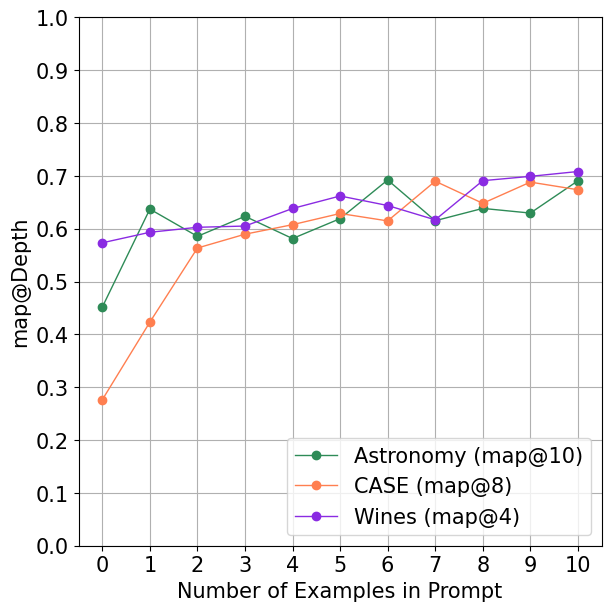

In [69]:
fig, axs = plt.subplots(1, 1, figsize=(6, 6), layout='constrained')

for ont, depth, name, color in ontologies:
    axs.plot(range(0, 11), llama_map_results[ont][context]["depth"], color=color, marker="o", linewidth=1, label=f"{name} (map@{depth})")
    # axs.plot(range(1, 11), map_results[ont]["generic"]["1"], color=color, marker="P", label=f"{name} (map@{depth})")
axs.grid('on')
# axs.set_title(f"Few-Shot Variation for Ontology Population (Generic Prompt) ({llm})")
axs.set_xlabel("Number of Examples in Prompt")
axs.set_ylabel("map@Depth")
axs.set_xticks(range(0, 11))
axs.set_yticks(np.arange(0, 1.1, step=0.1))
axs.legend(loc="lower right")
plt.savefig(f"/home/upal/Submissions/ISWC 2025/assets/{llm}-n-shot-variation-{context}-map.pdf", format="pdf")

### GPT-4o

In [70]:
gpt_map_results = {
    "astronomy-ontology": {
        "generic": {
            "depth": [],
            "1": [],
        },
        "topic": {
            "depth": [],
            "1": [],
        },
        "ontology": {
            "depth": [],
            "1": [],
        },
        "both": {
            "depth": [],
            "1": [],
        },
    },
    "case-uco-owl-trafficking": {
        "generic": {
            "depth": [],
            "1": [],
        },
        "topic": {
            "depth": [],
            "1": [],
        },
        "ontology": {
            "depth": [],
            "1": [],
        },
        "both": {
            "depth": [],
            "1": [],
        },
    },
    "wines-ontology": {
        "generic": {
            "depth": [],
            "1": [],
        },
        "topic": {
            "depth": [],
            "1": [],
        },
        "ontology": {
            "depth": [],
            "1": [],
        },
        "both": {
            "depth": [],
            "1": [],
        },
    },
}

In [71]:
llm = "gpt-4o"

In [72]:
for ont, depth, _, _ in ontologies:
    uids = list(map(lambda x: (x.path,
                               f"/home/upal/PhD/Experiments/llm_ontology_awareness/run_args/term_typing/ranked_retrieval/0_shot/{llm}/{ont}/{os.path.basename(x.path)}.json"),
                    os.scandir(f"/home/upal/Results/llm_ontology_awareness/term_typing/ranked_retrieval/0_shot/{llm}/{ont}")))
    for i in range(1, 11):
        uids.extend(list(map(lambda x: (x.path,
                               f"/home/upal/PhD/Experiments/llm_ontology_awareness/run_args/term_typing/ranked_retrieval/{i}_shot/most_common/{llm}/{ont}/{os.path.basename(x.path)}.json"),
                    os.scandir(f"/home/upal/Results/llm_ontology_awareness/term_typing/ranked_retrieval/{i}_shot/most_common/{llm}/{ont}"))))
    for result_path, run_args_path in uids:
        try:
            with open(os.path.join(result_path, "runs", "run_1", "pred_metrics.json"), "r") as f:
                data = json.load(f)
            with open(run_args_path, "r") as f:
               run_args = json.load(f)
            if ("Generic Prompt" in run_args["description"]):
                gpt_map_results[ont]["generic"]["depth"].append(data[f"map_{depth}"])
                # map_results[ont]["generic"]["1"].append(data["map_1"])
            elif ("Domain Prompt" in run_args["description"]):
                gpt_map_results[ont]["topic"]["depth"].append(data[f"map_{depth}"])
                # map_results[ont]["topic"]["1"].append(data["map_1"])
            elif ("Domain and Ontology Prompt" in run_args["description"]):
                gpt_map_results[ont]["both"]["depth"].append(data[f"map_{depth}"])
                # map_results[ont]["both"]["1"].append(data["map_1"])
            else:
                gpt_map_results[ont]["ontology"]["depth"].append(data[f"map_{depth}"])
                # map_results[ont]["ontology"]["1"].append(data["map_1"])
        except Exception:
            continue

In [73]:
gpt_map_results

{'astronomy-ontology': {'generic': {'depth': [0.6697939360929557,
    0.7935341362913324,
    0.7713937847866419,
    0.8269938295831153,
    0.8198451450892857,
    0.8174414710034513,
    0.8241975486431131,
    0.8113966488234637,
    0.784280045351474,
    0.8104305987931896,
    0.7988419002658534],
   '1': []},
  'topic': {'depth': [0.605038693718228,
    0.7847630470098487,
    0.7831861343022057,
    0.8396135313099599,
    0.824536188173186,
    0.7877880583450311,
    0.8090709805427548,
    0.8356563701679821,
    0.7815543509070295,
    0.8180875033629271,
    0.3160190977846165],
   '1': []},
  'ontology': {'depth': [0.7497350329020497,
    0.8296687269435137,
    0.7724816189101903,
    0.8071016483516483,
    0.7860917348710318,
    0.8352528974552784,
    0.8349130915807182,
    0.7936189639790342,
    0.8473480017006803,
    0.7842649842422845,
    0.7778194395574322],
   '1': []},
  'both': {'depth': [0.7292036374735078,
    0.8038891427217654,
    0.7597832062117775,

In [82]:
context = "both"

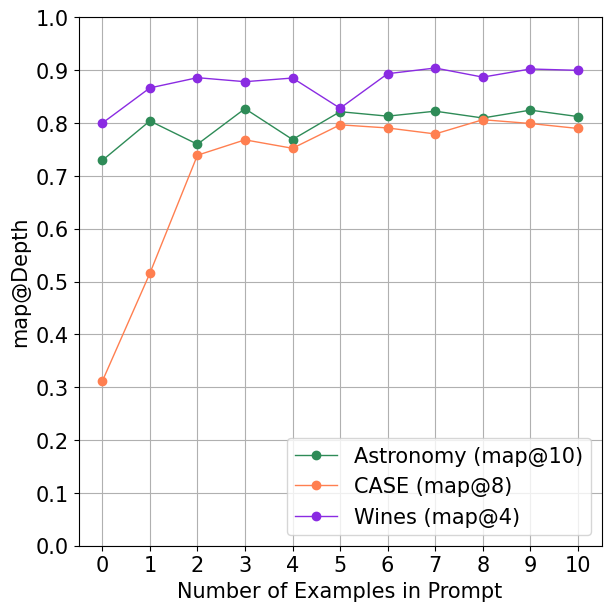

In [83]:
fig, axs = plt.subplots(1, 1, figsize=(6, 6), layout='constrained')

for ont, depth, name, color in ontologies:
    axs.plot(range(0, 11), gpt_map_results[ont][context]["depth"], color=color, marker="o", linewidth=1, label=f"{name} (map@{depth})")
    # axs.plot(range(1, 11), map_results[ont]["generic"]["1"], color=color, marker="P", label=f"{name} (map@{depth})")
axs.grid('on')
# axs.set_title(f"Few-Shot Variation for Ontology Population (Generic Prompt) ({llm})")
axs.set_xlabel("Number of Examples in Prompt")
axs.set_ylabel("map@Depth")
axs.set_xticks(range(0, 11))
axs.set_yticks(np.arange(0, 1.1, step=0.1))
axs.legend(loc="lower right")
plt.savefig(f"/home/upal/Submissions/ISWC 2025/assets/{llm}-n-shot-variation-{context}-map.pdf", format="pdf")

## Statistical Consistency GPT-4o vs. Llama3

In [1]:
!pip install scipy


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [1]:
from statistics import mean
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import json
import os
import numpy as np
from collections import defaultdict
from scipy.interpolate import make_interp_spline

In [2]:
ontologies = [("case-uco-owl-trafficking", 8, "CASE", "coral"),
              ("wines-ontology", 4, "Wines", "blueviolet")]

In [3]:
gpt_4o_results = {
    "wines-ontology": {
        "low": {
            "generic": {
                "depth": [],
                "1": [],
            },
            "topic": {
                "depth": [],
                "1": [],
            },
            "ontology": {
                "depth": [],
                "1": [],
            },
            "both": {
                "depth": [],
                "1": [],
            },
        },
        "default": {
            "generic": {
                "depth": [],
                "1": [],
            },
            "topic": {
                "depth": [],
                "1": [],
            },
            "ontology": {
                "depth": [],
                "1": [],
            },
            "both": {
                "depth": [],
                "1": [],
            },
        },
        "high": {
            "generic": {
                "depth": [],
                "1": [],
            },
            "topic": {
                "depth": [],
                "1": [],
            },
            "ontology": {
                "depth": [],
                "1": [],
            },
            "both": {
                "depth": [],
                "1": [],
            },
        },
    },
    "case-uco-owl-trafficking": {
        "low": {
            "generic": {
                "depth": [],
                "1": [],
            },
            "topic": {
                "depth": [],
                "1": [],
            },
            "ontology": {
                "depth": [],
                "1": [],
            },
            "both": {
                "depth": [],
                "1": [],
            },
        },
        "default": {
            "generic": {
                "depth": [],
                "1": [],
            },
            "topic": {
                "depth": [],
                "1": [],
            },
            "ontology": {
                "depth": [],
                "1": [],
            },
            "both": {
                "depth": [],
                "1": [],
            },
        },
        "high": {
            "generic": {
                "depth": [],
                "1": [],
            },
            "topic": {
                "depth": [],
                "1": [],
            },
            "ontology": {
                "depth": [],
                "1": [],
            },
            "both": {
                "depth": [],
                "1": [],
            },
        },
    },
}

In [4]:
llama3_results = {
    "wines-ontology": {
        "low": {
            "generic": {
                "depth": [],
                "1": [],
            },
            "topic": {
                "depth": [],
                "1": [],
            },
            "ontology": {
                "depth": [],
                "1": [],
            },
            "both": {
                "depth": [],
                "1": [],
            },
        },
        "default": {
            "generic": {
                "depth": [],
                "1": [],
            },
            "topic": {
                "depth": [],
                "1": [],
            },
            "ontology": {
                "depth": [],
                "1": [],
            },
            "both": {
                "depth": [],
                "1": [],
            },
        },
        "high": {
            "generic": {
                "depth": [],
                "1": [],
            },
            "topic": {
                "depth": [],
                "1": [],
            },
            "ontology": {
                "depth": [],
                "1": [],
            },
            "both": {
                "depth": [],
                "1": [],
            },
        },
    },
    "case-uco-owl-trafficking": {
        "low": {
            "generic": {
                "depth": [],
                "1": [],
            },
            "topic": {
                "depth": [],
                "1": [],
            },
            "ontology": {
                "depth": [],
                "1": [],
            },
            "both": {
                "depth": [],
                "1": [],
            },
        },
        "default": {
            "generic": {
                "depth": [],
                "1": [],
            },
            "topic": {
                "depth": [],
                "1": [],
            },
            "ontology": {
                "depth": [],
                "1": [],
            },
            "both": {
                "depth": [],
                "1": [],
            },
        },
        "high": {
            "generic": {
                "depth": [],
                "1": [],
            },
            "topic": {
                "depth": [],
                "1": [],
            },
            "ontology": {
                "depth": [],
                "1": [],
            },
            "both": {
                "depth": [],
                "1": [],
            },
        },
    },
}

In [5]:
for ont, depth, _, _ in ontologies:
    for gpt_var in ["gpt-4o", "gpt-4o-temp_high", "gpt-4o-temp_low"]:
        temp_var = gpt_var.split("_")[-1]
        temp_var = temp_var if temp_var in ["low", "high"] else "default"
        print(temp_var)
        for r_args in os.scandir(f"/home/upal/Results/llm_ontology_awareness/term_typing/ranked_retrieval/3_shot/most_common/{gpt_var}/{ont}"):
            for run in os.scandir(os.path.join(r_args.path, "runs")):
                with open(os.path.join(run.path, "pred_metrics.json"), "r") as f:
                    data = json.load(f)
                with open(os.path.join(r_args.path, "params.json"), "r") as f:
                   run_args = json.load(f)
                if ("Generic Prompt" in run_args["description"]):
                    gpt_4o_results[ont][temp_var]["generic"]["depth"].append(data[f"map_{depth}"])
                    # map_results[ont]["generic"]["1"].append(data["map_1"])
                elif ("Domain Prompt" in run_args["description"]):
                    gpt_4o_results[ont][temp_var]["topic"]["depth"].append(data[f"map_{depth}"])
                    # map_results[ont]["topic"]["1"].append(data["map_1"])
                elif ("Domain and Ontology Prompt" in run_args["description"]):
                    gpt_4o_results[ont][temp_var]["both"]["depth"].append(data[f"map_{depth}"])
                    # map_results[ont]["both"]["1"].append(data["map_1"])
                else:
                    gpt_4o_results[ont][temp_var]["ontology"]["depth"].append(data[f"map_{depth}"])

    for llama_var in ["llama3-7B", "llama3-7B-temp_high", "llama3-7B-temp_low"]:
        temp_var = llama_var.split("_")[-1]
        temp_var = temp_var if temp_var in ["low", "high"] else "default"
        print(temp_var)
        for r_args in os.scandir(f"/home/upal/Results/llm_ontology_awareness/term_typing/ranked_retrieval/3_shot/most_common/{llama_var}/{ont}"):
            for run in os.scandir(r_args.path):
                with open(os.path.join(run.path, "pred_metrics.json"), "r") as f:
                    data = json.load(f)
                with open(os.path.join(run.path, "params.json"), "r") as f:
                    run_args = json.load(f)
                if ("Generic Prompt" in run_args["description"]):
                    llama3_results[ont][temp_var]["generic"]["depth"].append(data[f"map_{depth}"])
                    # map_results[ont]["generic"]["1"].append(data["map_1"])
                elif ("Domain Prompt" in run_args["description"]):
                    llama3_results[ont][temp_var]["topic"]["depth"].append(data[f"map_{depth}"])
                    # map_results[ont]["topic"]["1"].append(data["map_1"])
                elif ("Domain and Ontology Prompt" in run_args["description"]):
                    llama3_results[ont][temp_var]["both"]["depth"].append(data[f"map_{depth}"])
                    # map_results[ont]["both"]["1"].append(data["map_1"])
                else:
                    llama3_results[ont][temp_var]["ontology"]["depth"].append(data[f"map_{depth}"])

default
high
low
default
high
low
default
high
low
default
high
low


In [6]:
gpt_4o_results

{'wines-ontology': {'low': {'generic': {'depth': [0.8779447960618846,
     0.8792633614627285,
     0.8819444444444445,
     0.8680555555555555,
     0.8761867088607594,
     0.8869549929676511,
     0.8718793952180028,
     0.877065752461322,
     0.8888009845288326,
     0.8824279184247539],
    '1': []},
   'topic': {'depth': [0.881065400843882,
     0.9035249648382561,
     0.8868670886075949,
     0.8869110407876232,
     0.8880537974683544,
     0.8888009845288326,
     0.8885812236286921,
     0.8924050632911392,
     0.8893723628691984,
     0.8840981012658228],
    '1': []},
   'ontology': {'depth': [0.8942950070323489,
     0.8872187060478199,
     0.8759669479606188,
     0.877065752461322,
     0.8946466244725738,
     0.8874384669479606,
     0.8972837552742616,
     0.8921853023909986,
     0.8888009845288326,
     0.8837904360056259],
    '1': []},
   'both': {'depth': [0.891306258790436,
     0.9007120253164557,
     0.8883175105485231,
     0.8917457805907174,
     0.8

In [7]:
llama3_results

{'wines-ontology': {'low': {'generic': {'depth': [0.6793248945147679,
     0.6791490857946554,
     0.7247714486638537,
     0.6875439521800282,
     0.6861814345991561,
     0.6911919831223629,
     0.6318565400843882,
     0.6842035864978904,
     0.6894778481012658,
     0.7038941631504922],
    '1': []},
   'topic': {'depth': [0.7212992264416315,
     0.7549226441631505,
     0.691587552742616,
     0.7009054149085795,
     0.7549226441631505,
     0.6597222222222222,
     0.6678973277074542,
     0.6573048523206751,
     0.7034106891701828,
     0.7096958509142053],
    '1': []},
   'ontology': {'depth': [0.6606012658227848,
     0.6040348101265823,
     0.7050369198312236,
     0.6638537271448663,
     0.6624472573839663,
     0.683104781997187,
     0.662710970464135,
     0.6726441631504922,
     0.7332542194092827,
     0.70512482419128],
    '1': []},
   'both': {'depth': [0.671193741209564,
     0.7311884669479606,
     0.7547028832630098,
     0.6087816455696202,
     0.693

In [8]:
llm_results = {
    "llama3": llama3_results,
    "gpt-4o": gpt_4o_results,
}

In [9]:
xticks = ["low", "default", "high"]

In [10]:
ind = [0, 0.6, 1.2]

In [20]:
ontology = "case-uco-owl-trafficking"

In [21]:
context = "ontology"

In [22]:
values = defaultdict(list)
avg = defaultdict(list)
yerrslow = defaultdict(list)
yerrsup = defaultdict(list)

In [23]:
for llm_name in llm_results:
    #values[llm_name] = list(map(lambda x: llm_results[llm_name][ontology][x][context]["depth"], xticks))
    values[llm_name] = {k: llm_results[llm_name][ontology][k][context]["depth"] for k in xticks}
    avg[llm_name] = list(map(lambda x: mean(llm_results[llm_name][ontology][x][context]["depth"]),
                      xticks))
    yerrslow[llm_name] = list(map(lambda x: mean(llm_results[llm_name][ontology][x][context]["depth"]) -
                      min(llm_results[llm_name][ontology][x][context]["depth"]),
                      xticks))
    yerrsup[llm_name] = list(map(lambda x: max(llm_results[llm_name][ontology][x][context]["depth"]) -
                      mean(llm_results[llm_name][ontology][x][context]["depth"]),
                      xticks))

In [24]:
values

defaultdict(list,
            {'llama3': {'low': [0.5535652724631519,
               0.6716374805130385,
               0.583337374663407,
               0.6461842315051021,
               0.6501825684700964,
               0.43350853883219953,
               0.6317231456384637,
               0.5821677362351191,
               0.6468243892609127,
               0.5793477957589286],
              'default': [0.5182368064413265,
               0.5521255403202948,
               0.5130671259389172,
               0.5831857971053005,
               0.524769566680839,
               0.577435050843254,
               0.6242244521506519,
               0.5742457770868764,
               0.6481921082234977,
               0.5463727900014173],
              'high': [0.539906994047619,
               0.5275959843572846,
               0.5376949360473355,
               0.5946234809027777,
               0.46558457562712585,
               0.5054381576849489,
               0.616045508698271,
  

In [25]:
yerrslow

defaultdict(list,
            {'llama3': [0.16433931450184236,
              0.053118375540320284,
              0.09231302924815754],
             'gpt-4o': [0.008135354662698435,
              0.017940317858914367,
              0.021942266555059486]})

In [30]:
plt.rcParams.update(plt.rcParamsDefault)
lines = {'linestyle': 'None'}
plt.rc('lines', **lines)

In [31]:
llm_stats = {
    "llama3": {
        "name": "Llama3-8B",
        "color": "deepskyblue",
        "offset": +0.10,
    },
    "gpt-4o": {
        "name": "GPT-4o",
        "color": "teal",
        "offset": -0.10,
    },
}

In [32]:
plt.rcParams.update({'font.size': 11})

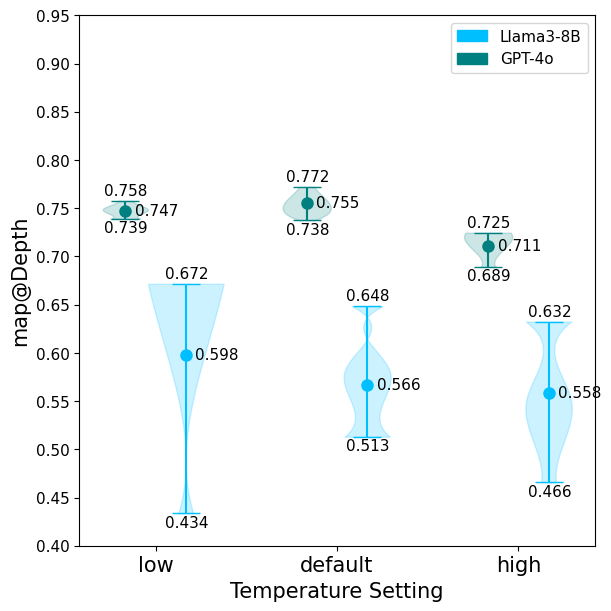

In [33]:
fig, axs = plt.subplots(1, 1, figsize=(6, 6), layout="constrained")
for i,_ in enumerate(xticks):
    for llm_name in llm_stats:
    # # Annotate the data value
        axs.annotate(str(f"{avg[llm_name][i]:.{3}f}"),
                     xy=(ind[i]+llm_stats[llm_name]["offset"], avg[llm_name][i]),
                     xytext=(7,-3),
                     textcoords='offset points')
        axs.annotate(str(f"{avg[llm_name][i]-yerrslow[llm_name][i]:.{3}f}"),
                     xy=(ind[i]+llm_stats[llm_name]["offset"], avg[llm_name][i]-yerrslow[llm_name][i]),
                     xytext=(-15,-10),
                     textcoords='offset points')
        axs.annotate(str(f"{avg[llm_name][i]+yerrsup[llm_name][i]:.{3}f}"),
                     xy=(ind[i]+llm_stats[llm_name]["offset"], avg[llm_name][i]+yerrsup[llm_name][i]),
                     xytext=(-15,4),
                     textcoords='offset points')
        val_range = np.linspace(min(values[llm_name][xticks[i]]), max(values[llm_name][xticks[i]]), num=5)
        density, edges = np.histogram(values[llm_name][xticks[i]], density=True, bins=5, range=(min(values[llm_name][xticks[i]]), max(values[llm_name][xticks[i]])))
        density = density/np.sum(density)
        xnew = np.linspace(val_range.min(), val_range.max(), 300) 
        spl = make_interp_spline(val_range, density, k=3)  # type: BSpline
        density = spl(xnew)

        
        density_l = ind[i] + llm_stats[llm_name]["offset"] - density/4.0
        density_r = ind[i] + llm_stats[llm_name]["offset"]  + density/4.0
        # print(density_l, density_r)
        # y_values = np.arange(
        # axs.fill_betweenx(sorted(values[llm_name][xticks[i]]), density_l, density_r, color=llm_stats[llm_name]["color"], alpha=0.2)
        axs.fill_betweenx(xnew, density_l, density_r, color=llm_stats[llm_name]["color"], alpha=0.2)

        # print(values[llm_name])
        axs.errorbar(ind[i]+llm_stats[llm_name]["offset"],
                     avg[llm_name][i],
                     yerr=[[yerrslow[llm_name][i]], [yerrsup[llm_name][i]]],
                     fmt='o', markersize=8, capsize=10, color=llm_stats[llm_name]["color"])

# axs.grid('on')
axs.set_xticks(ind)
axs.set_xticklabels(xticks, fontsize=15)
# axs.set_title(f"mAP Variation ${ontology}  (${context})")
axs.set_xlabel("Temperature Setting", fontsize=15)
axs.set_ylabel("map@Depth", fontsize=15)
axs.legend(handles=[mpatches.Patch(color=v["color"], label=v["name"]) for k, v in llm_stats.items()], loc="upper right")
axs.set_yticks(np.arange(0.40, 1.0, step=0.05))
plt.savefig(f"/home/upal/Submissions/ISWC 2025/assets/{ontology}-temp-stat-variation-{context}.pdf", format="pdf")

In [15]:
from scipy.stats import ttest_ind

In [26]:
ttest_ind(dict(values)["llama3"]["low"], dict(values)["llama3"]["default"], equal_var=False)

TtestResult(statistic=np.float64(1.2079571304798622), pvalue=np.float64(0.2453751602254497), df=np.float64(15.32509277242486))

In [27]:
ttest_ind(dict(values)["llama3"]["high"], dict(values)["llama3"]["default"], equal_var=False)

TtestResult(statistic=np.float64(-0.3754239567317158), pvalue=np.float64(0.7118723001272715), df=np.float64(17.43978162648621))

In [28]:
ttest_ind(dict(values)["gpt-4o"]["low"], dict(values)["gpt-4o"]["default"], equal_var=False)

TtestResult(statistic=np.float64(-2.4127056707721586), pvalue=np.float64(0.028911408664817968), df=np.float64(15.191639753410522))

In [29]:
ttest_ind(dict(values)["gpt-4o"]["high"], dict(values)["gpt-4o"]["default"], equal_var=False)

TtestResult(statistic=np.float64(-9.844583879341602), pvalue=np.float64(1.5998260873396324e-08), df=np.float64(17.359703773193022))

In [27]:
import numpy as np

In [41]:
np.array(dict(values)["gpt-4o"]["high"]).std()

np.float64(0.01044159970806761)

## Domain Contextualization Variation

In [27]:
contexts = [("generic", "s"), ("ontology", "o"), ("topic", "p"), ("both", "*")]

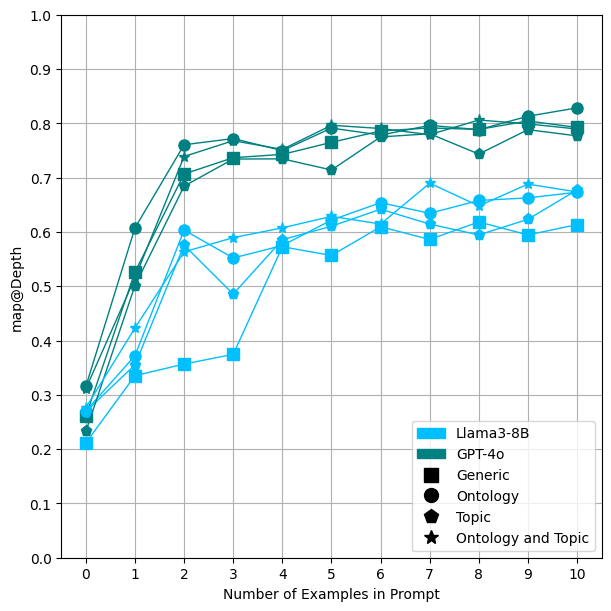

In [45]:
fig, axs = plt.subplots(1, 1, figsize=(6, 6), layout='constrained')
ont = "case-uco-owl-trafficking"
for (context, m) in contexts:
    axs.plot(range(0, 11), llama_map_results[ont][context]["depth"], color="deepskyblue", marker=m, linewidth=1, markersize=8)
    axs.plot(range(0, 11), gpt_map_results[ont][context]["depth"], color="teal", marker=m, linewidth=1, markersize=8)
# axs.plot(range(1, 11), map_results[ont]["generic"]["1"], color=color, marker="P", label=f"{name} (map@{depth})")
axs.grid('on')
# axs.set_title(f"Few-Shot Variation for Ontology Population (Generic Prompt) ({llm})")
axs.set_xlabel("Number of Examples in Prompt")
axs.set_ylabel("map@Depth")
axs.set_xticks(range(0, 11))
axs.set_yticks(np.arange(0, 1.1, step=0.1))
generic = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
                          markersize=10, label='Generic')
ontology = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=10, label='Ontology')
topic = mlines.Line2D([], [], color='black', marker='p', linestyle='None',
                          markersize=10, label='Topic')
both = mlines.Line2D([], [], color='black', marker='*', linestyle='None',
                          markersize=10, label='Ontology and Topic')
axs.legend(handles=[mpatches.Patch(color="deepskyblue", label="Llama3-8B"), mpatches.Patch(color="teal", label="GPT-4o"), generic, ontology, topic, both])
plt.savefig(f"/home/upal/Submissions/ISWC 2025/assets/{ont}-domain-contextualization-map.pdf", format="pdf")